In [1]:
import uproot
import pandas as pd
import numpy as np
import glob


In [2]:
# !pip install pycaret

In [3]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('belle2')

import os

In [35]:
import uproot
import pandas as pd
import numpy as np
import glob

# Define the pattern to match your files
file_pattern = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/b2bii/etapip_eteeta/belle_etaetapip_loose_v0_241024_treefit_massconst_s11_4/*.root"
file_list = glob.glob(file_pattern)

# Initialize an empty list to hold DataFrames
dataframes = []
branches_all = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_Eta_genMotherPDG','etapip_Eta_genMotherID','etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'Pip_genMotherPDG','Pip_genMotherID',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar','num_Dstar_no_nan','CFT_qr','CFT_prob']
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_gg"]

    # Specify the branches you want to extract
    # branches = ['Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    branches = ['dM_pi0_75MeV','dM_pi0_75MeV_2','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg = pd.concat(dataframes, ignore_index=True)

df_bkg = df_bkg.query('Dp_isSignal!=1')
df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
df_bkg = df_bkg.query('dM_pi0_75MeV>0.011 &  dM_pi0_75MeV_2>0.011 ')
df_bkg['Dp_Psum'] = (df_bkg['etapip_Eta_p'] + df_bkg['Pip_p'])

# df_bkg = df_bkg.query('Dp_M<1.93 | Dp_M>2.02')
# df_bkg = df_bkg.query('abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7')
# df_bkg = df_bkg.query('num_Dstar_no_nan<0 ')

In [36]:
nan_columns = df_bkg.isnull().any()
print(nan_columns)

dM_pi0_75MeV                                          False
dM_pi0_75MeV_2                                        False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                            True
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_Easym                                      False
etapip_Eta_p                                          False
Dp_M                                                  False
num_Dstar_no_nan                                      False
etapip_Eta_daughterDiffOfPhi_0_1        

In [37]:
#signalMC need to be used

In [38]:
df_signal = pd.concat(dataframes, ignore_index=True)
df_signal['Dp_Psum'] = (df_signal['etapip_Eta_p'] + df_signal['Pip_p'])

df_signal = df_signal.query('Dp_isSignal==1')

In [39]:
# df_signal  = pd.concat([df_signal , df_signal, df_signal, df_signal ], ignore_index=True)
df_signal  = pd.concat([df_signal , df_signal], ignore_index=True)


In [40]:
nan_columns = df_signal.isnull().any()
print(nan_columns)

dM_pi0_75MeV                                          False
dM_pi0_75MeV_2                                        False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                           False
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_Easym                                      False
etapip_Eta_p                                          False
Dp_M                                                  False
num_Dstar_no_nan                                      False
etapip_Eta_daughterDiffOfPhi_0_1        

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Ensure the signal and background datasets are balanced
min_size = min(len(df_signal), len(df_bkg))

# Sample an equal number of rows from both signal and background
df_signal_balanced = df_signal.sample(n=min_size, random_state=42)
df_bkg_balanced = df_bkg.sample(n=min_size, random_state=42)

# Assign labels: signal=1, background=0
df_signal_balanced['label'] = 1
df_bkg_balanced['label'] = 0

# Concatenate the signal and background datasets
df_combined = pd.concat([df_signal_balanced, df_bkg_balanced], ignore_index=True)

# Shuffle the combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the specified columns
columns_to_drop = ['dM_pi0_75MeV','dM_pi0_75MeV_2','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_isSignal','Dp_CMS_p', 'Dp_M', 'Pip_p', 'etapip_Eta_p', 'num_Dstar_no_nan','etapip_Eta_daughterAngle_0_1'] 
                   # 'etapip_Eta_daughterDiffOfPhi_0_1', 'etapip_Eta_daughterAngle_0_1']
df_combined = df_combined.drop(columns=columns_to_drop)


In [42]:
df_combined.describe()

,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,etapip_Eta_Easym,etapip_Eta_daughterDiffOfPhi_0_1,Dp_Psum,label
count,207380.000000,2.073800e+05,207380.000000,207380.000000,207380.000000,207380.000000,207380.000000
mean,-0.028072,3.574508e-02,0.330199,0.465273,-0.009034,3.780779,0.500000
std,0.669360,9.571323e-02,0.915766,0.267355,1.261885,0.872136,0.500001
min,-0.999996,8.601549e-09,-1.000000,0.000006,-3.141426,1.933557,0.000000
25%,-0.707763,4.178294e-03,-0.987848,0.235911,-0.679826,3.096352,0.000000
50%,-0.011041,1.059490e-02,0.995498,0.466861,-0.027175,3.718826,0.500000
75%,0.637466,2.657845e-02,0.999862,0.689628,0.665153,4.353602,1.000000
max,0.999998,9.996044e-01,1.000000,0.968620,3.141586,9.959238,1.000000


In [45]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_combined.drop(columns='label')
y = df_combined['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target
X = X_train
y = y_train

# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [ 7, 9, 11],
    'learning_rate': [ 0.2, 0.4, 0.6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=2,  # 2-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X, y)



# Get the best model and its parameters
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Save the best model if needed
import joblib
joblib.dump(best_xgb_model, 'b2bii_best_xgb_model_etapip_gg_thirdtry.pkl')


# xgb_model.fit(X,y)
# best_xgb_model = xgb_model

Fitting 2 folds for each of 243 candidates, totalling 486 fits


/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 11, 'n_estimators': 250, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8169423280933552


['b2bii_best_xgb_model_etapip_gg_thirdtry.pkl']

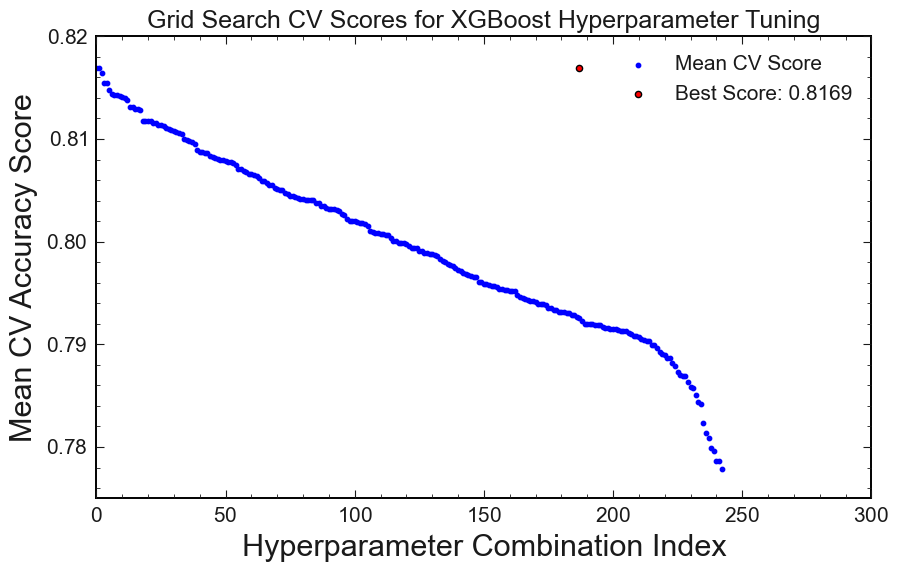

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract all mean cross-validation scores and parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)

# Sort results by mean test score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Highlight the best score
best_score = grid_search.best_score_

# Plotting the scores using Matplotlib
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(
    range(len(results_df)),
    results_df['mean_test_score'],
    c='blue',  # Color for the points
    s=10,
    marker='o',
    label='Mean CV Score'
)

# Highlighting the best score
best_index = results_df['mean_test_score'].idxmax()
plt.scatter(best_index, best_score, color='red', s=20, label=f'Best Score: {best_score:.4f}', edgecolor='black')

# Adding labels and legend
plt.title("Grid Search CV Scores for XGBoost Hyperparameter Tuning")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Mean CV Accuracy Score")
plt.legend()
plt.xlim(0,)
# Save the figure
plt.savefig("b2bii_etapip_gg_gridsearch_thirdtry.png")

# Show the plot
plt.show()

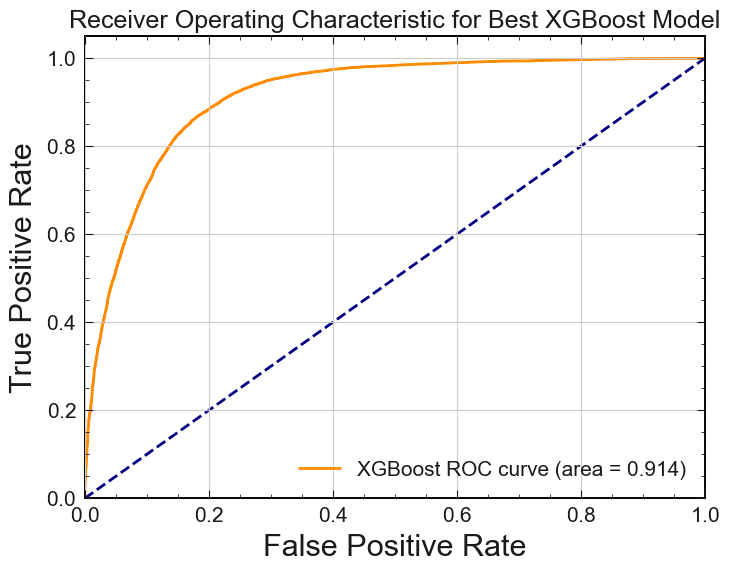

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)

# Uncomment the following lines to save the plot
# save_path = '~/PLOTS/XGBoost/240919_ROC_xgb.png'
# save_path_full = os.path.expanduser(save_path)
# plt.savefig(save_path_full)
# plt.savefig("b2bii_etapip_gg_roc_thirdtry.png")

plt.show()

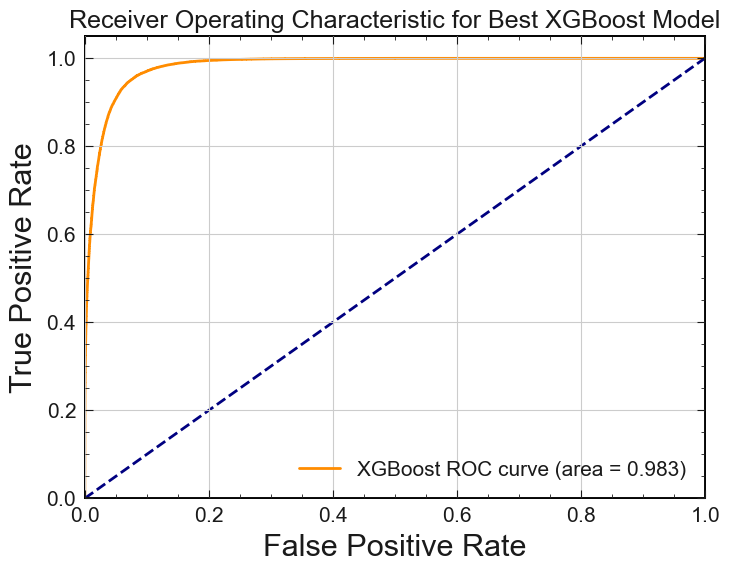

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_train)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)

# Uncomment the following lines to save the plot
# save_path = '~/PLOTS/XGBoost/240919_ROC_xgb.png'
# save_path_full = os.path.expanduser(save_path)
# plt.savefig(save_path_full)
# plt.savefig("b2bii_etapip_gg_roc_thirdtry.png")

plt.show()

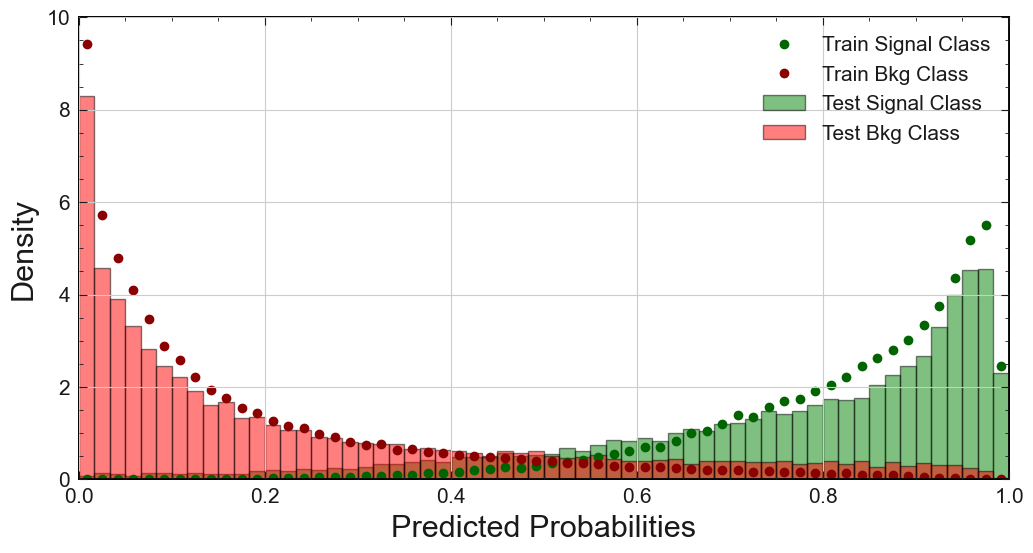

In [70]:
# Get predicted probabilities
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for train (as points) and test (as bars)
def plot_probability_histograms(y_train_true, y_train_probs, y_test_true, y_test_probs):
    plt.figure(figsize=(12, 6))
    
    # Define a common set of bins for both train and test
    bins = np.linspace(0, 1, 61)  # 60 bins from 0 to 1 for predicted probabilities

    # Test set: Plot histograms as bars
    plt.hist(y_test_probs[y_test_true == 1], bins=bins, alpha=0.5, label='Test Signal Class', color='green', edgecolor='black', density=True)
    plt.hist(y_test_probs[y_test_true == 0], bins=bins, alpha=0.5, label='Test Bkg Class', color='red', edgecolor='black', density=True)

    # Train set: Calculate histogram values for points
    hist_train_pos, _ = np.histogram(y_train_probs[y_train_true == 1], bins=bins, density=True)
    hist_train_neg, _ = np.histogram(y_train_probs[y_train_true == 0], bins=bins, density=True)

    # Calculate the bin centers (to place the points in the middle of each bin)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot the train set histograms as points
    plt.plot(bin_centers, hist_train_pos, 'o', label='Train Signal Class', color='darkgreen')
    plt.plot(bin_centers, hist_train_neg, 'o', label='Train Bkg Class', color='darkred')

    # Labels, title, and legend
    plt.xlabel('Predicted Probabilities')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0,1)

# Calculate predicted probabilities for the training and test sets
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]
# y_train_probs =   catboost.predict_proba(X_train)[:, 1]
# y_test_probs =  catboost.predict_proba(X_test)[:, 1]
# Plot histograms with train set as points and test set as bars
plot_probability_histograms(
    y_train, y_train_probs,
    y_test, y_test_probs
)

# save_path = '~/PLOTS/HBDT/241004_outputs_momentum_sum_etapip_pipipi.png'
# save_path_full = os.path.expanduser(save_path)

# plt.savefig(save_path_full)
plt.savefig("b2bii_etapip_gg_BDT_output_thirdtry.png")
plt.show()

In [50]:
# Define the pattern to match your files
file_pattern = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/b2bii/etapip_eteeta/belle_etaetapip_loose_v0_241024_treefit_massconst_s11_4/*.root"
file_list = glob.glob(file_pattern)

# Initialize an empty list to hold DataFrames
dataframes = []

for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_gg"]

    # Specify the branches you want to extract
    # branches = ['Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    branches = ['dM_pi0_75MeV','dM_pi0_75MeV_2','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg_apply = pd.concat(dataframes, ignore_index=True)

df_bkg_apply = df_bkg_apply.query('dM_pi0_75MeV>0.011 &  dM_pi0_75MeV_2>0.011 ')
df_bkg_apply['Dp_Psum'] = (df_bkg_apply['etapip_Eta_p'] + df_bkg_apply['Pip_p'])

In [51]:
# Separate signal and background data
df_isSignal_true = df_bkg_apply.query('Dp_isSignal==1')
df_isSignal_false = df_bkg_apply.query('Dp_isSignal!=1')

In [52]:
df_isSignal_false

,dM_pi0_75MeV,dM_pi0_75MeV_2,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_Easym,etapip_Eta_p,Dp_M,num_Dstar_no_nan,etapip_Eta_daughterDiffOfPhi_0_1,etapip_Eta_daughterAngle_0_1,Dp_Psum
0,0.069604,0.378583,3.0,0.0,-521.0,0.0,-0.567263,0.050504,0.0,-0.999997,0.817568,2.650875,0.812220,2.302804,1.975032,-1.0,0.479343,0.815970,3.120372
1,0.016293,0.214494,2.0,0.0,521.0,300553.0,0.648198,0.006546,0.0,-0.986705,1.594405,2.785252,0.571157,0.633782,1.739542,-1.0,-3.097892,1.843635,2.228186
2,0.026590,0.236387,3.0,9.0,-521.0,431.0,0.402145,0.002992,0.0,-0.941004,2.380675,2.985359,0.810457,1.426397,1.656549,-1.0,1.330823,1.317354,3.807071
3,0.042890,0.035032,3.0,5.0,-521.0,431.0,0.184471,0.003536,0.0,-0.999989,2.147229,2.721154,0.607345,1.799867,1.857319,-1.0,0.516420,0.750590,3.947096
4,0.087066,0.012444,2.0,0.0,521.0,0.0,0.365840,0.004571,0.0,-0.768276,1.934815,2.985417,0.761840,1.206341,1.803997,-1.0,-0.931852,1.384726,3.141156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7202249,0.284717,0.044295,17.0,0.0,-213.0,0.0,0.107652,0.008555,0.0,0.978937,1.901690,3.711855,0.718712,1.918800,1.608423,-1.0,0.193765,0.811837,3.820489
7202250,0.618025,0.134422,14.0,0.0,223.0,0.0,0.322801,0.002531,0.0,0.980776,2.382393,2.801710,0.163571,1.530008,2.059771,-1.0,0.807465,0.697492,3.912401
7202251,0.028867,0.100945,0.0,0.0,10022.0,0.0,0.949301,0.004325,0.0,0.729402,1.986103,2.840474,0.546403,0.415151,2.086289,-1.0,2.339714,2.517059,2.401254
7202252,0.108868,0.233729,0.0,0.0,10022.0,0.0,0.193624,0.005816,0.0,-0.999833,1.522601,2.610679,0.720387,1.304313,1.656286,-1.0,-0.261338,1.184815,2.826914


In [53]:
# Drop the specified columns, but keep 'Dp_M' for reference
columns_to_drop = ['dM_pi0_75MeV','dM_pi0_75MeV_2','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_isSignal','Dp_CMS_p', 'Dp_M', 'Pip_p', 'etapip_Eta_p', 'num_Dstar_no_nan','etapip_Eta_daughterAngle_0_1'] 
df_isSignal_true_dropped = df_isSignal_true.drop(columns=columns_to_drop)
df_isSignal_false_dropped = df_isSignal_false.drop(columns=columns_to_drop)

In [54]:
# Reorder the columns of df_isSignal_true_dropped and df_isSignal_false_dropped to match the training data's feature order
df_isSignal_true_dropped = df_isSignal_true_dropped[best_xgb_model.get_booster().feature_names]
df_isSignal_false_dropped = df_isSignal_false_dropped[best_xgb_model.get_booster().feature_names]

# Now try to predict probabilities
isSignal_true_probabilities = best_xgb_model.predict_proba(df_isSignal_true_dropped)
df_isSignal_true_dropped['prob_signal'] = isSignal_true_probabilities[:, 1]

isSignal_false_probabilities = best_xgb_model.predict_proba(df_isSignal_false_dropped)
df_isSignal_false_dropped['prob_signal'] = isSignal_false_probabilities[:, 1]


In [55]:
# Optionally, you can combine the datasets back with 'Dp_M' if needed
df_isSignal_true_combined = pd.merge(df_isSignal_true, df_isSignal_true_dropped[['prob_signal']], left_index=True, right_index=True)
df_isSignal_false_combined = pd.merge(df_isSignal_false, df_isSignal_false_dropped[['prob_signal']], left_index=True, right_index=True)


In [56]:
# Prepare the data
df_combined_all_range = pd.concat([df_isSignal_true_combined, df_isSignal_false_combined], ignore_index=True)

df_combined_all_range['Dp_isSignal'] = df_combined_all_range['Dp_isSignal'].fillna(0)

In [57]:
df_combined_all_range = df_combined_all_range.query('num_Dstar_no_nan>-1000')

In [58]:
df_combined_all_range.columns.tolist()

['dM_pi0_75MeV',
 'dM_pi0_75MeV_2',
 'Pip_genMotherID',
 'etapip_Eta_genMotherID',
 'Pip_genMotherPDG',
 'etapip_Eta_genMotherPDG',
 'Dp_cosHelicityAngleMomentum',
 'Pip_dr',
 'Dp_isSignal',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Pip_p',
 'Dp_CMS_p',
 'etapip_Eta_Easym',
 'etapip_Eta_p',
 'Dp_M',
 'num_Dstar_no_nan',
 'etapip_Eta_daughterDiffOfPhi_0_1',
 'etapip_Eta_daughterAngle_0_1',
 'Dp_Psum',
 'prob_signal']

In [59]:
df_combined = df_combined_all_range.query('Dp_M>1.83 & Dp_M<1.89')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


Best cut value: 0.8
Best figure of merit: 128.470266317978


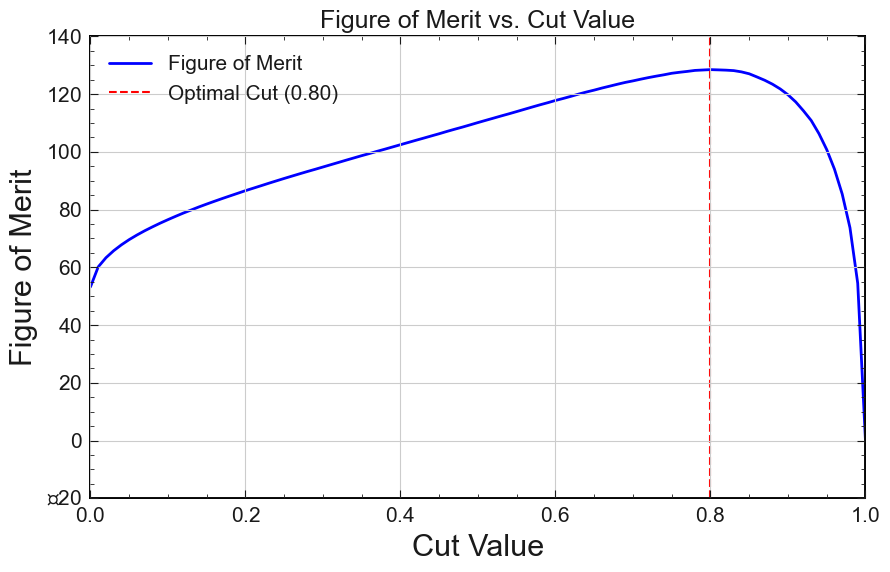

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the figure of merit function using query
def figure_of_merit(df, cut_value):
    df_cut = df.query('prob_signal > @cut_value')
    Nsig = (df_cut['Dp_isSignal'] == 1).sum()
    Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
    if Nsig + Nbkg == 0:
        return 0
    return Nsig / np.sqrt(Nsig + Nbkg)

# Define range of cut values to test
cut_values = np.linspace(0, 1, 101)  # You can adjust the range and granularity

# Calculate figure of merit for each cut value
figures_of_merit = [figure_of_merit(df_combined, cut) for cut in cut_values]

# Find the best cut value
best_cut = cut_values[np.argmax(figures_of_merit)]
best_fom = max(figures_of_merit)

# Print the best cut value and corresponding figure of merit
print(f'Best cut value: {best_cut}')
print(f'Best figure of merit: {best_fom}')

# Plot figure of merit vs. cut value
plt.figure(figsize=(10, 6))
plt.plot(cut_values, figures_of_merit, color='blue', label='Figure of Merit', linewidth=2)
plt.axvline(x=best_cut, color='red', linestyle='--', label=f'Optimal Cut ({best_cut:.2f})')
plt.xlabel('Cut Value')
plt.ylabel('Figure of Merit')
plt.title('Figure of Merit vs. Cut Value')
plt.xlim(0,1)
plt.legend()
plt.grid(True)
plt.savefig("b2bii_etapip_gg_FOM_thirdtry.png")

plt.show()

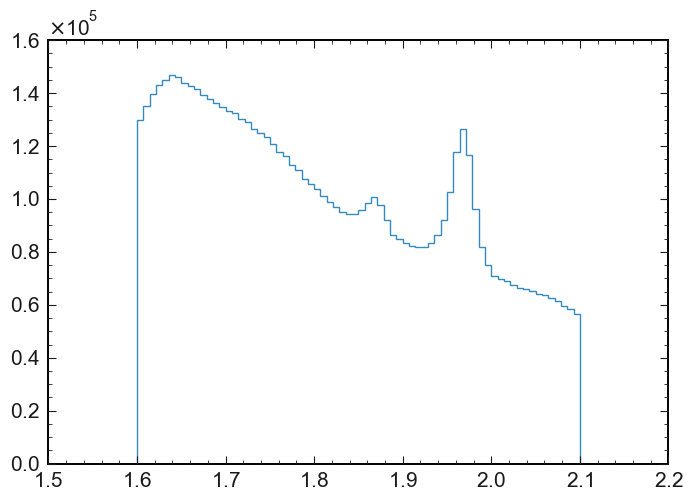

In [61]:
plt.hist(df_combined_all_range['Dp_M'],bins=np.linspace(1.6,2.1,71),histtype='step');

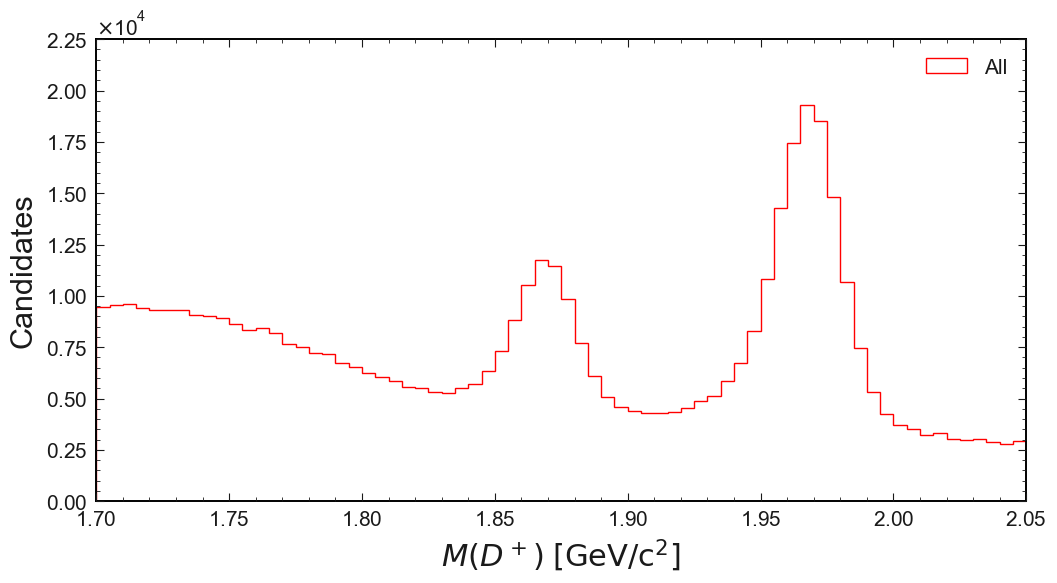

nsig=43396


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > @optimal_cut')
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='All')

# Histogram for background
# plt.hist(df_background['Dp_M'], bins=np.linspace(1.6, 2.1, 71), histtype='step', color='red', label='Background')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(1.7,2.05)
plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')

plt.savefig("b2bii_etapip_gg_Dp_M_all_thirdtry.png")

plt.show()


df_signal_matched_true = df_signal.query('Dp_isSignal==1')
print(f'nsig={len(df_signal_matched_true)}')


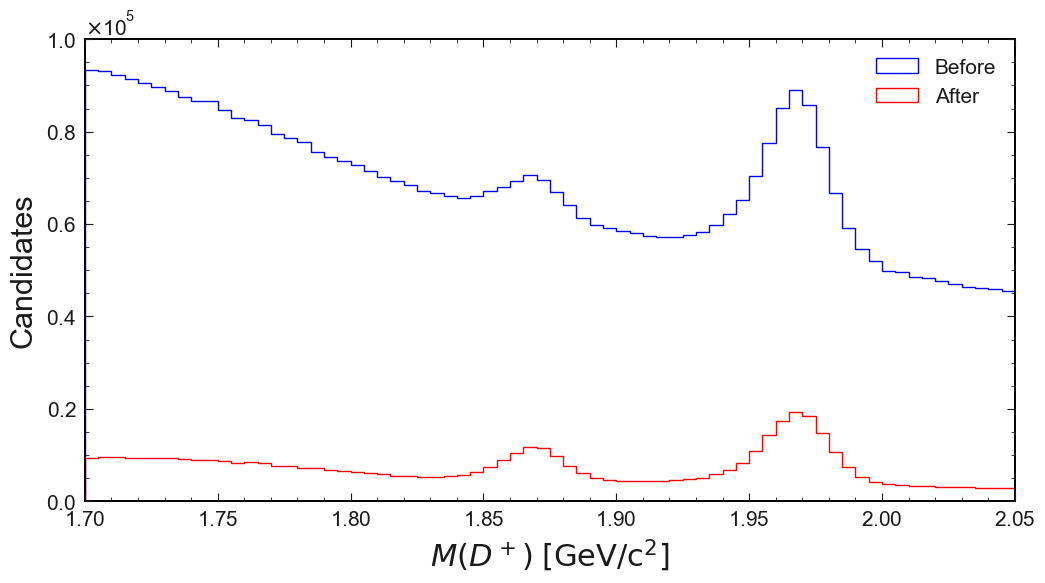

nsig=7202254


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > 0')
df_background = df_combined_all_range.query('prob_signal > @optimal_cut')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='blue', label='Before')

# Histogram for background
plt.hist(df_background['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='After')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)

plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')
plt.xlim(1.7,2.05)
plt.savefig("b2bii_etapip_gg_Dp_M_before_after_thirdtry.png")

plt.show()


print(f'nsig={len(df_signal)}')


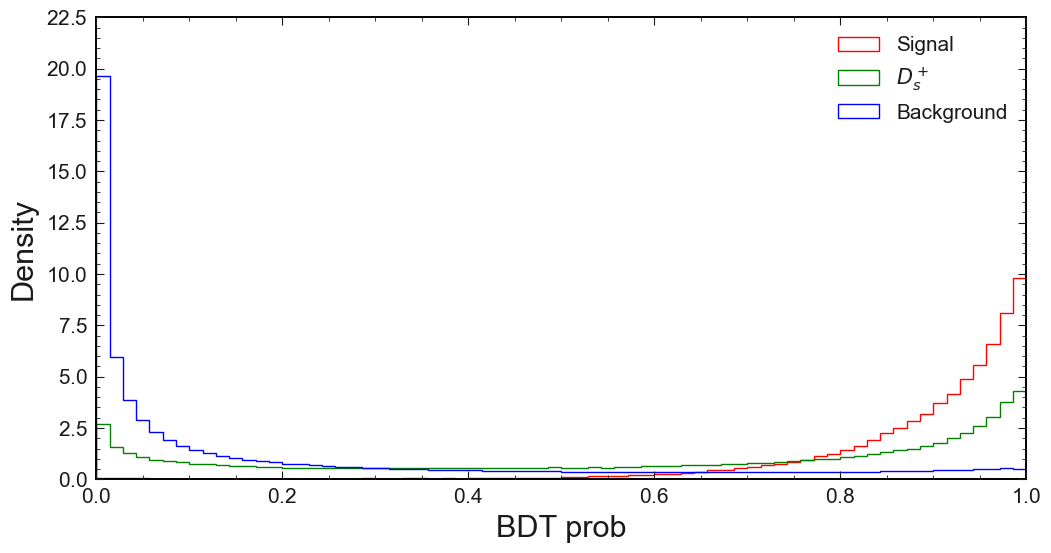

nsig=51845


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('Dp_isSignal==1')
df_background = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
df_background_Ds = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID==etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 & abs(etapip_Eta_genMotherPDG)==431')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='red', label='Signal',density=True)
plt.hist(df_background_Ds['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='green', label='$D_s^+$',density=True)

# Histogram for background
plt.hist(df_background['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='blue', label='Background',density=True)

plt.xlabel('BDT prob')
plt.ylabel('Density')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(0,1)
plt.savefig("b2bii_etapip_gg_BDT_output_Dp_Ds_bkg_thirdtry.png")

plt.show()


print(f'nsig={len(df_signal)}')